<div class='alert alert-success'>
    <h1 align="center">Advanced Optimization</h1> 
    <h2 align="center"> Machine Learning Cours, Andrew NG, week 3</h2>
   
</div>

"Conjugate gradient", "BFGS", and "L-BFGS" are more sophisticated, faster ways to optimize θ that can be used instead of gradient descent. It is suggested that one should not write these more sophisticated algorithms yourself (unless an expert in numerical computing) but use the libraries instead, as they're already tested and highly optimized. Here is one example

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize  # for optimization

In [2]:
# we want to optimize the cost function 
def J(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

In [3]:
t0 = np.linspace(0, 10, 100)
t1 = np.linspace(0, 10, 100)

T0, T1 = np.meshgrid(t0, t1)
Z = (T0 - 5) ** 2 + (T1 - 5) ** 2

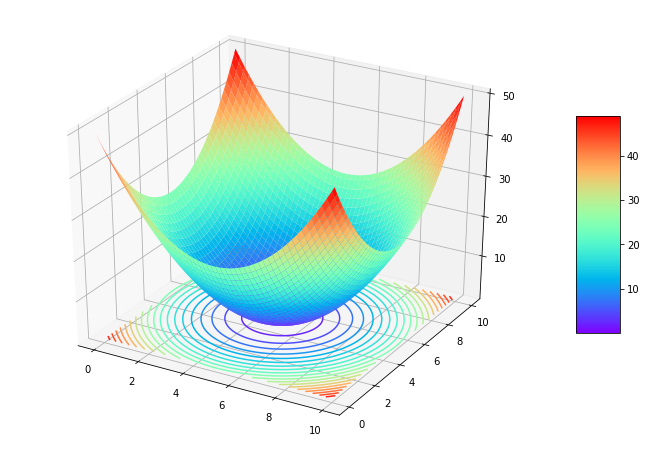

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(T0, T1, Z, cmap=plt.cm.rainbow)
cset = ax.contour(T0, T1, Z, 20, zdir='z', offset=0, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

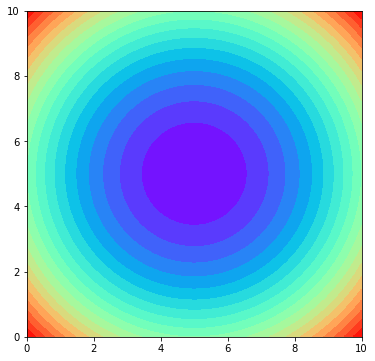

In [5]:
# or contour plot
plt.figure(figsize=(6, 6))
cset = plt.contourf(T0, T1, Z, 20, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

###  `scipy.optimize.minimize`

After defining the cost function, we can use the `minimize` function from `scipy.optimize` to minimize the cost function.

In [6]:
minimize(J, x0=[0, 0], method='CG')  #Conjugate gradient

     fun: 2.4774723757749714e-18
     jac: array([1.71271317e-08, 1.71271317e-08])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

Another initial guess:

In [8]:
minimize(J, x0=[10, -3], method='CG')

     fun: 2.730455135196181e-16
     jac: array([ 1.12131602e-08, -1.79405912e-08])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([5.        , 4.99999998])

In [9]:
#Random initial guess:
minimize(J, x0=np.random.randn(2), method='CG')

     fun: 2.4700237303281898e-17
     jac: array([2.26872476e-08, 8.72234196e-09])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([5., 5.])

In [10]:
# Saving the outputs of the minimize function
summary = minimize(J, x0=np.random.randn(2), method='CG')

In [13]:
#summary.success
summary.x
#summary.nit

array([4.99999999, 4.99999999])

#### Providing gradient information

In [14]:
def gradients(theta):
    return np.array([2 * (theta[0] - 5), 2 * (theta[1] - 5)])

In [15]:
gradients([5, 5])

array([0, 0])

In [16]:
minimize(J, x0=np.random.randn(2), method='CG', jac=gradients)

     fun: 3.473712003893539e-16
     jac: array([-2.77458376e-08, -2.48928362e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 3
    njev: 7
  status: 0
 success: True
       x: array([4.99999999, 4.99999999])

using a
sophisticated optimization library, it makes
the just a little bit
more opaque and so
just maybe a little bit harder to debug.
But because these algorithms often
run much faster than gradient descent,
often quite typically whenever
we have a large machine learning
problem, Iwe will use
these algorithms instead of using gradient descent. 